In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [5]:
init = time.time()
dirin = os.path.join("..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020")

fileinprefix = "SlicedDetections*100mmCylinder_01MeV*CutR1000*.csv"
df_ar41_100cylinder_01Mev = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_100cylinder_01Mev = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.columns[:-1]]

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
SlicedDetections*100mmCylinder_01MeV*CutR1000*.csv

[Info] Loaded data in 9.892 seconds


In [120]:
df_ar41_100cylinder_01Mev.detectionefficiency.mean()

0.0006164253903230255

In [9]:
df_ar41_100cylinder_01Mev.eventnumber.nunique()

14279

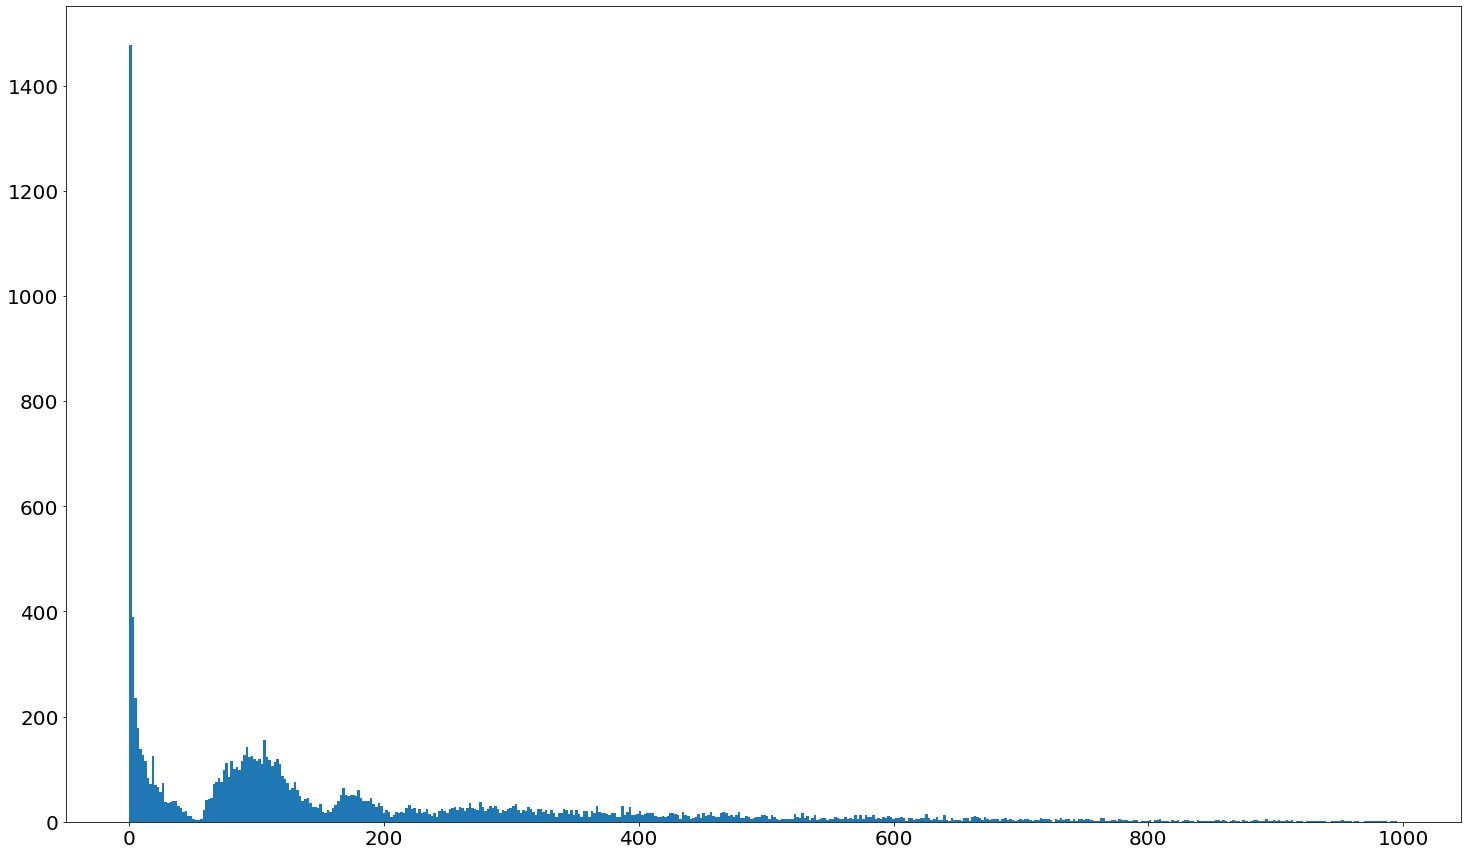

In [127]:
plt.hist(df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==2112].groupby("eventnumber").first().kineticenergy, bins=500)
plt.show()

In [121]:
df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.pedetected>0].eventnumber.nunique()

11733

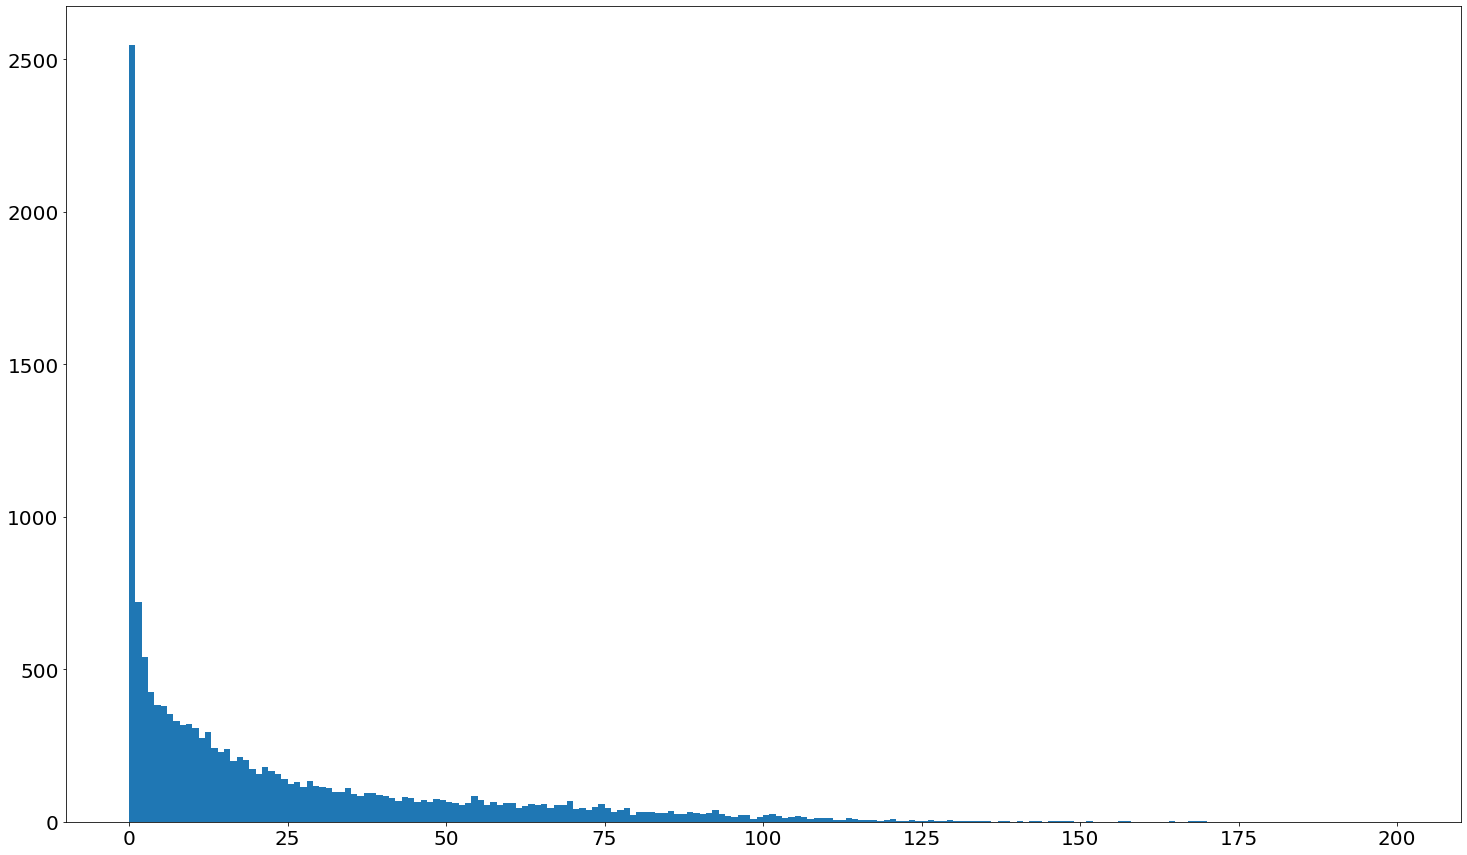

In [8]:
plt.hist(df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum(), bins=np.linspace(0, 200, 201))
plt.show()

In [10]:
df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum().describe()

count    14279.000000
mean        23.400658
std         27.813905
min          0.000000
25%          2.000000
50%         12.000000
75%         35.000000
max        169.000000
Name: pedetected, dtype: float64

In [14]:
df_pe_event = df_ar41_100cylinder_01Mev.groupby("eventnumber").pedetected.sum()
df_pe_event.describe()

count    14279.000000
mean        23.400658
std         27.813905
min          0.000000
25%          2.000000
50%         12.000000
75%         35.000000
max        169.000000
Name: pedetected, dtype: float64

# distribution pe over time

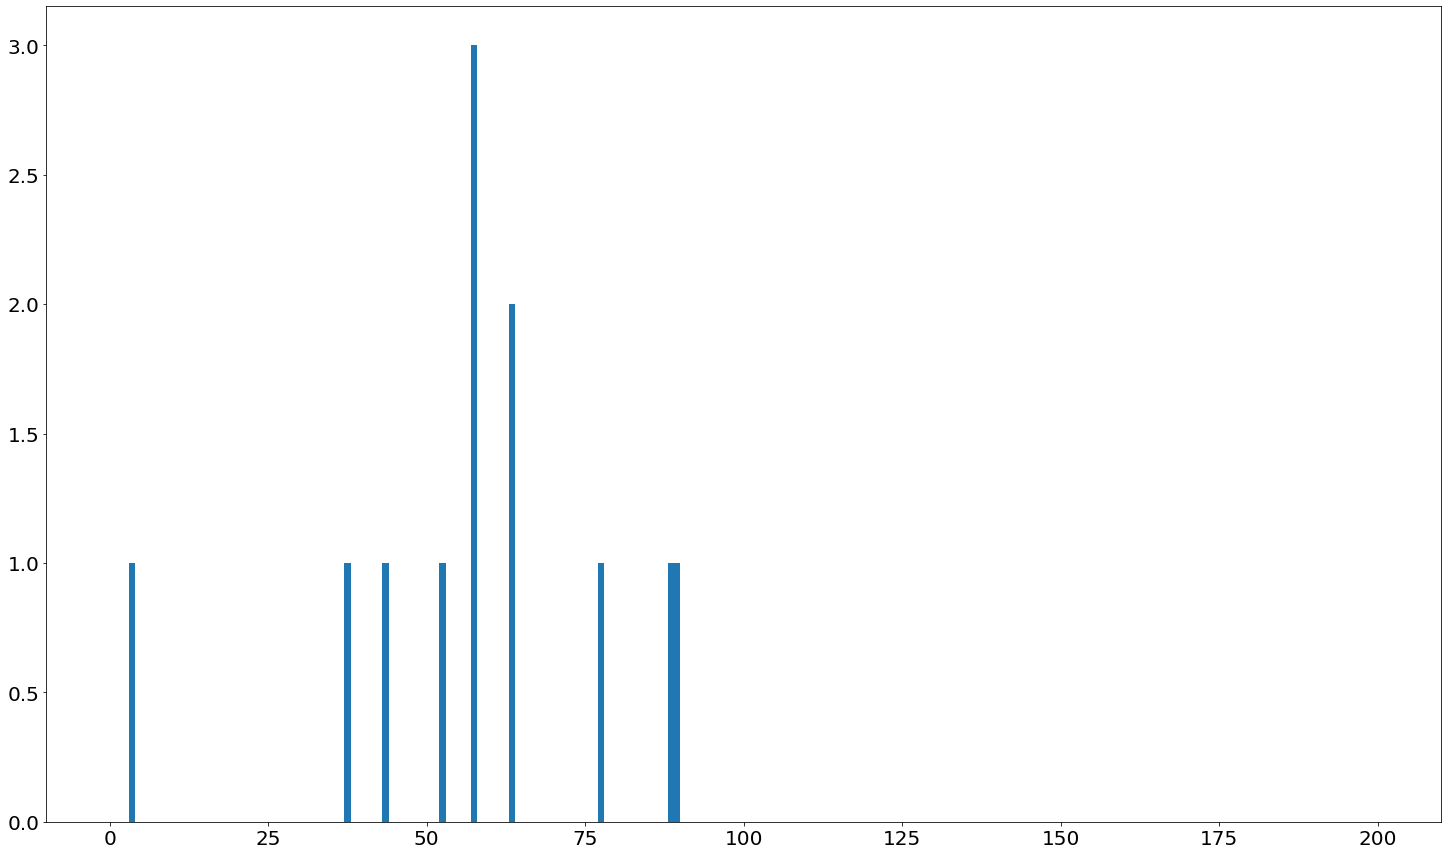

array([  35868,   37226,  180180,  208730,  435478,  636256,  908428,
        954338, 1022518, 1161759, 1633557, 1763842])

In [50]:
events_ar41 = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==1000180410].eventnumber.unique()
plt.hist(df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.eventnumber.isin(events_ar41)].groupby("eventnumber").pedetected.sum(), bins=np.linspace(0, 200, 201))
plt.show()
events_ar41

# features

In [15]:
# Create Features
def pe_detected(row):
    return np.sum(row.to_numpy())

def nr_active_slices(row):
    return np.nonzero(row.to_numpy())[0].shape[0]

def mean_npe(row):
    return np.mean(row.to_numpy())

def std_npe(row):
    return np.std(row.to_numpy())

def range_detections(row):
    rownp = row.to_numpy()
    return np.nonzero(rownp)[0][-1] - np.nonzero(rownp)[0][0] + 1

def spatial_var(row):
    rownp = row.to_numpy()
    return np.var(np.repeat(np.argwhere(rownp>0), rownp[rownp>0]))

def spatial_std(row):
    rownp = row.to_numpy()
    return np.std(np.repeat(np.argwhere(rownp>0), rownp[rownp>0]))

def compute_features(row):
    rownp = row.to_numpy()
    return [np.sum(rownp),                        # NPE
            np.nonzero(rownp)[0].shape[0],        # NActiveSlices
            np.mean(rownp),                       # Mean NPE
            np.std(rownp),                        # Std NPE
            np.nonzero(rownp)[0][-1] - np.nonzero(rownp)[0][0] + 1,    # Range
            np.var(np.repeat(np.argwhere(rownp>0), rownp[rownp>0])),   # Var
            np.std(np.repeat(np.argwhere(rownp>0), rownp[rownp>0]))]   # Var   

In [ ]:
features = df_ar41_100cylinder_01Mev.

In [41]:
df_ar41_100cylinder_01Mev.groupby("eventnumber").sum().iloc[:, 11:11+32]

,InnerSlice0,InnerSlice1,InnerSlice2,InnerSlice3,InnerSlice4,InnerSlice5,InnerSlice6,InnerSlice7,InnerSlice8,InnerSlice9,...,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18,OuterSlice19
eventnumber,,,,,,,,,,,,,,,,,,,,,
36,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
370,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999368,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,1,0,0,0,0
1999411,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1999432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
readouts = df_ar41_100cylinder_01Mev.groupby("eventnumber").sum().iloc[:, 11:11+32]

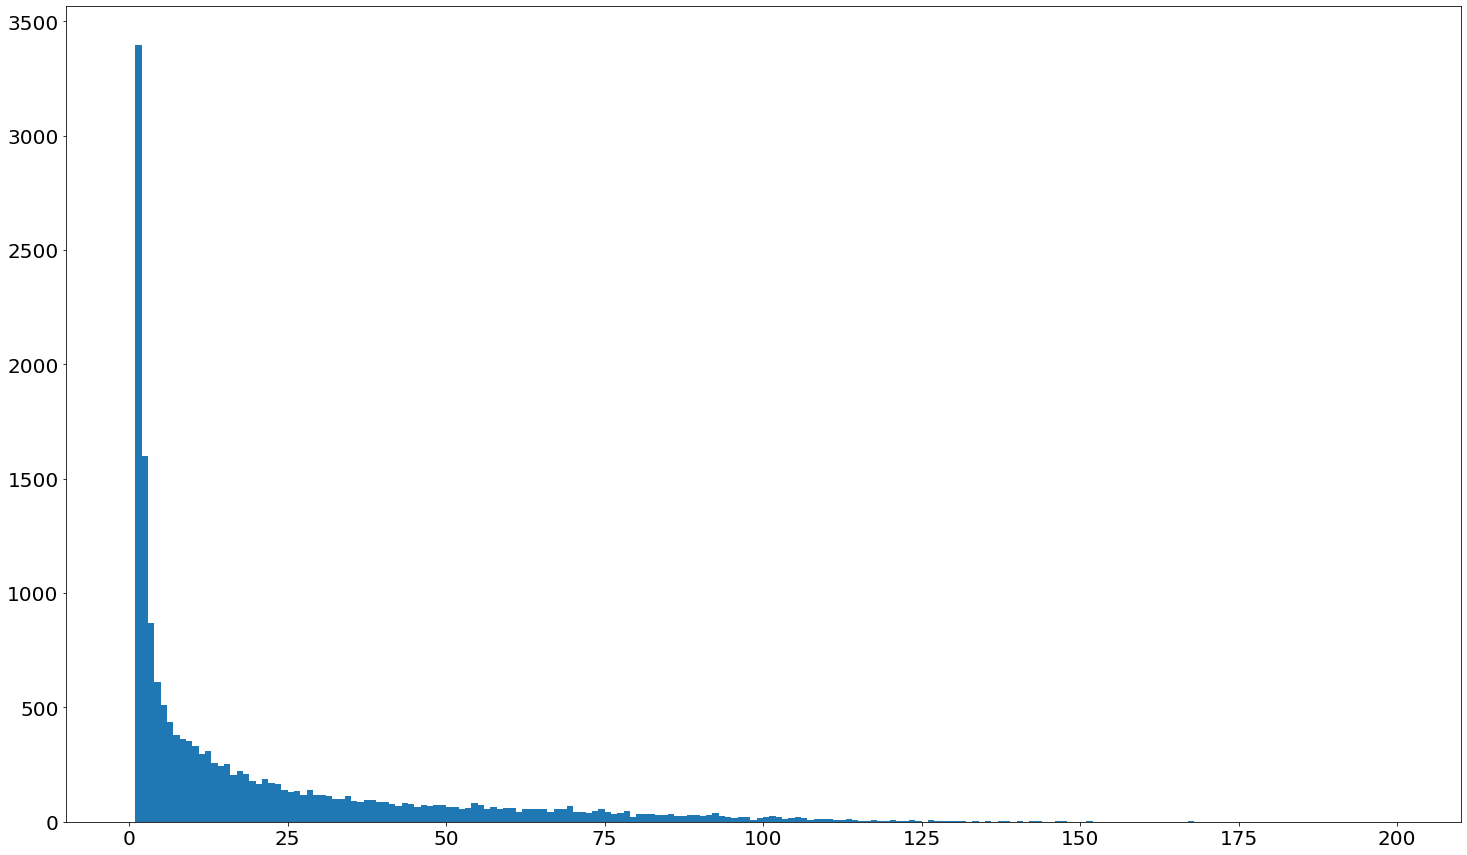

In [43]:
plt.hist(readouts.sum(axis=1), bins=np.linspace(0, 200, 201))
plt.show()

In [45]:
feat

,InnerSlice0,InnerSlice1,InnerSlice2,InnerSlice3,InnerSlice4,InnerSlice5,InnerSlice6,InnerSlice7,InnerSlice8,InnerSlice9,...,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18,OuterSlice19
eventnumber,,,,,,,,,,,,,,,,,,,,,
36,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
370,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
feat = pd.DataFrame()
feat["PEDetected_inner"] = readouts.apply()
feat["NActiveSlices_inner"]
feat["SpatialRange_inner"]
feat["SpatialStd_inner"] 

# load restricted data (cut R=1000mm)

In [3]:
init = time.time()
dirin = os.path.join("..", "Data", "OutputProcessing", "Neutrons_VariousConfig_08_20_2020")

fileinprefix = "SlicedDetections_2MNeutrons_100mmCylinder_01MeV_CutR1000_Slices12_20_Yield40_QuantumEff0.200000_Seed123456789.csv"
df_ar41_cut1000 = load_dataframe_from_files(dirin, fileinprefix)
df_ar41_cut1000 = df_ar41_cut1000[df_ar41_cut1000.columns[:-1]]

print("[Info] Loaded data in {:.3f} seconds".format(time.time() - init))

[Info] Loading 1 files wt prefix:
SlicedDetections_2MNeutrons_100mmCylinder_01MeV_CutR1000_Slices12_20_Yield40_QuantumEff0.200000_Seed123456789.csv

[Info] Loaded data in 33.248 seconds


In [5]:
df_ar41_cut1000.eventnumber.nunique()

14279

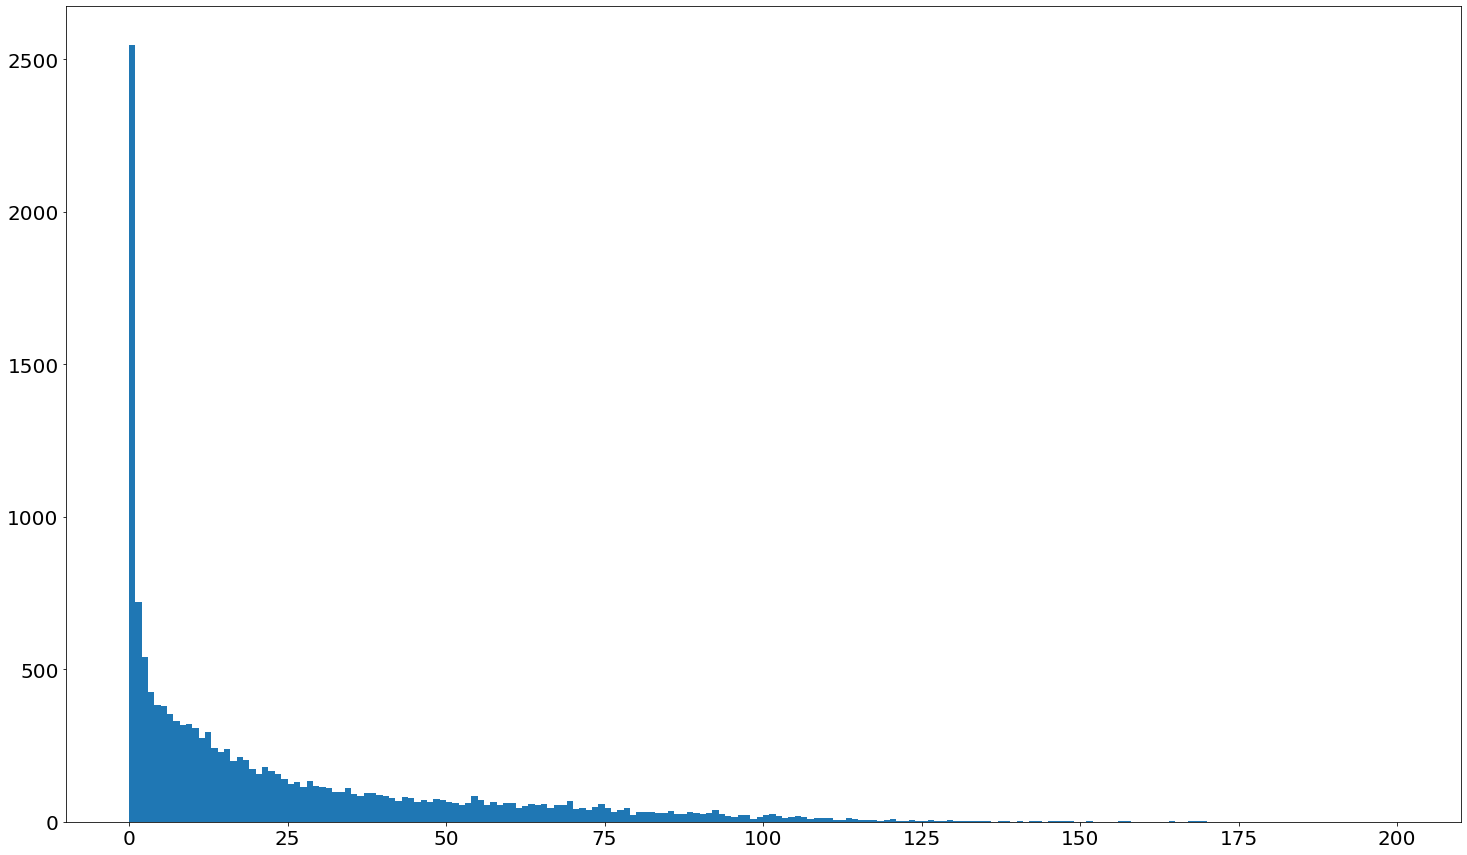

In [9]:
plt.hist(df_ar41_cut1000.groupby("eventnumber").pedetected.sum(), bins=np.linspace(0, 200, 201))
plt.show()

# compute time first pe detected

In [44]:
df_nonzero = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.pedetected>0]

In [63]:
df_first_ar41 = df_ar41_100cylinder_01Mev[df_ar41_100cylinder_01Mev.PID==1000180410].sort_values(["time"]).groupby("eventnumber").time.first().reset_index()

In [45]:
df_first_npe = df_nonzero.sort_values(["time"]).groupby("eventnumber").time.first().reset_index()

In [68]:
ext_df = df_nonzero.merge(df_first_npe, on="eventnumber", suffixes=["", "_1pe"])

In [69]:
ext_df = ext_df.merge(df_first_ar41, on="eventnumber", suffixes=["", "_ar41"])

In [70]:
len(df_nonzero) == len(ext_df)

True

In [66]:
(ext_df.time - ext_df.time_ar41).describe()

count    2.421530e+05
mean     2.355935e+12
std      6.344906e+12
min     -7.655170e+06
25%      3.206558e-01
50%      8.101505e-01
75%      3.379288e+00
max      8.336618e+13
dtype: float64

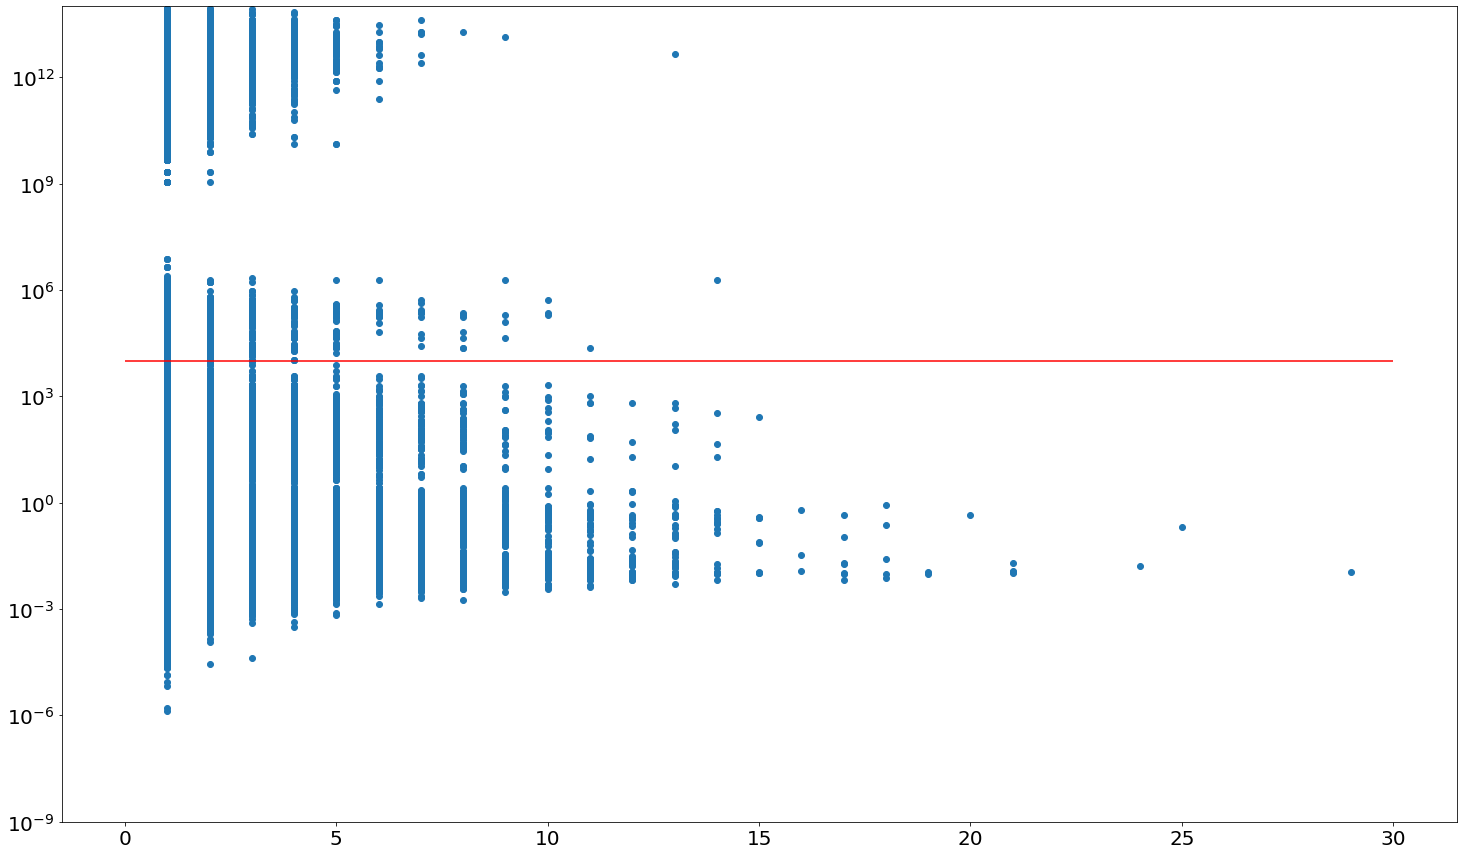

In [87]:
plt.scatter(ext_df.pedetected, ext_df.time-ext_df.time_1pe)
plt.hlines(10000, 0, 30, color='r')
plt.yscale("log")
plt.ylim(.000000001, 10**14)
plt.show()

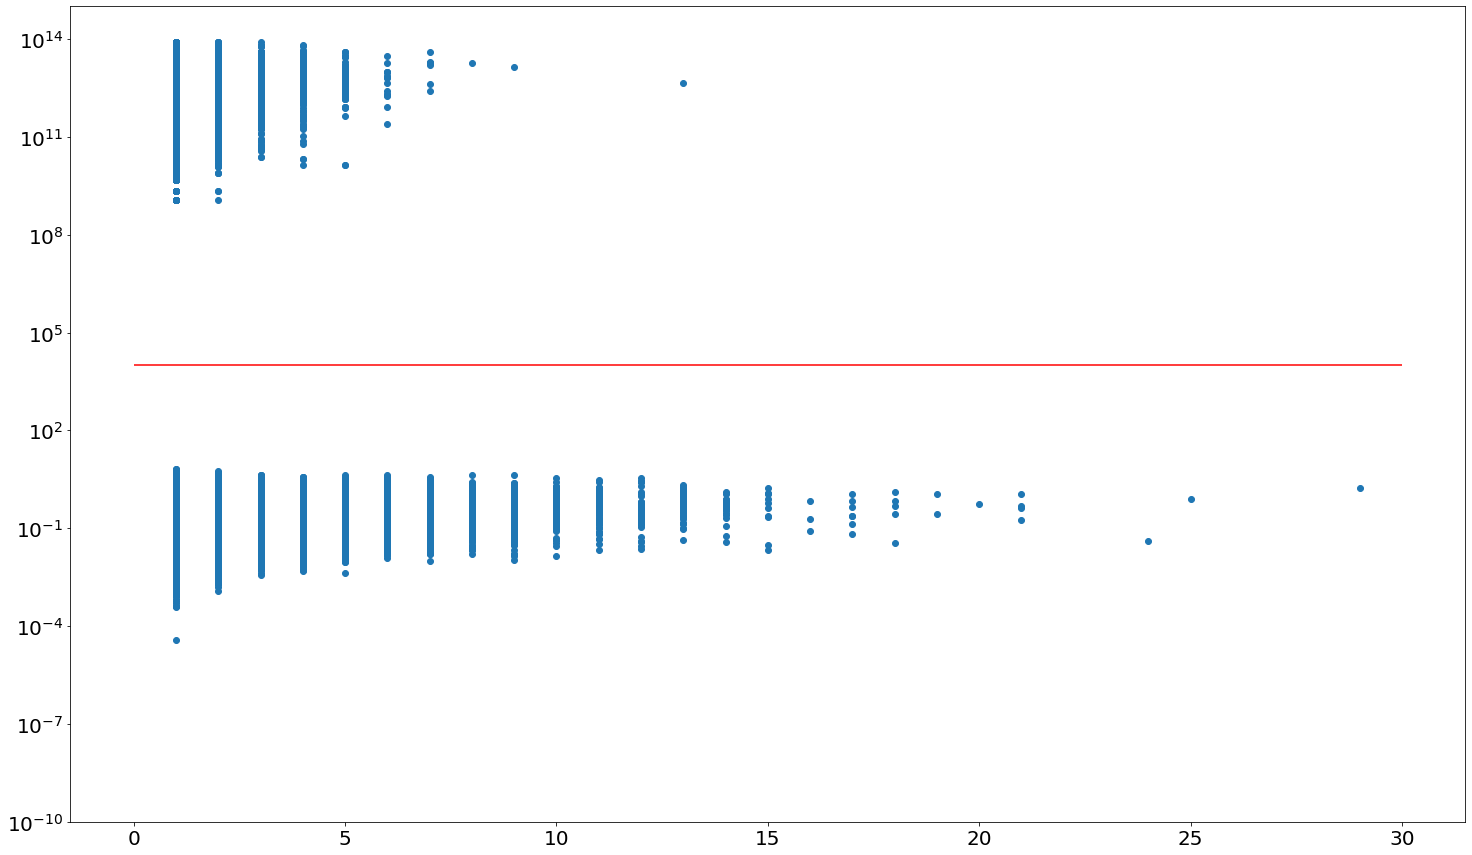

In [86]:
plt.scatter(ext_df.pedetected, ext_df.time-ext_df.time_ar41)
plt.hlines(10000, 0, 30, color='r')
plt.yscale("log")
plt.ylim(0.0000000001, 10**15)
plt.show()

In [119]:
ext_df[(ext_df.time-ext_df.time_1pe>10000) & (ext_df.time-ext_df.time_1pe<10**9)].groupby("eventnumber").pedetected.sum().describe()

count    205.000000
mean      19.082927
std       20.815905
min        1.000000
25%        5.000000
50%       10.000000
75%       26.000000
max       96.000000
Name: pedetected, dtype: float64

In [105]:
ext_df.eventnumber.unique()

array([     36,     203,     494, ..., 1999368, 1999432, 1999594])

In [107]:
event = ext_df[ext_df.eventnumber==100653].sort_values("time")

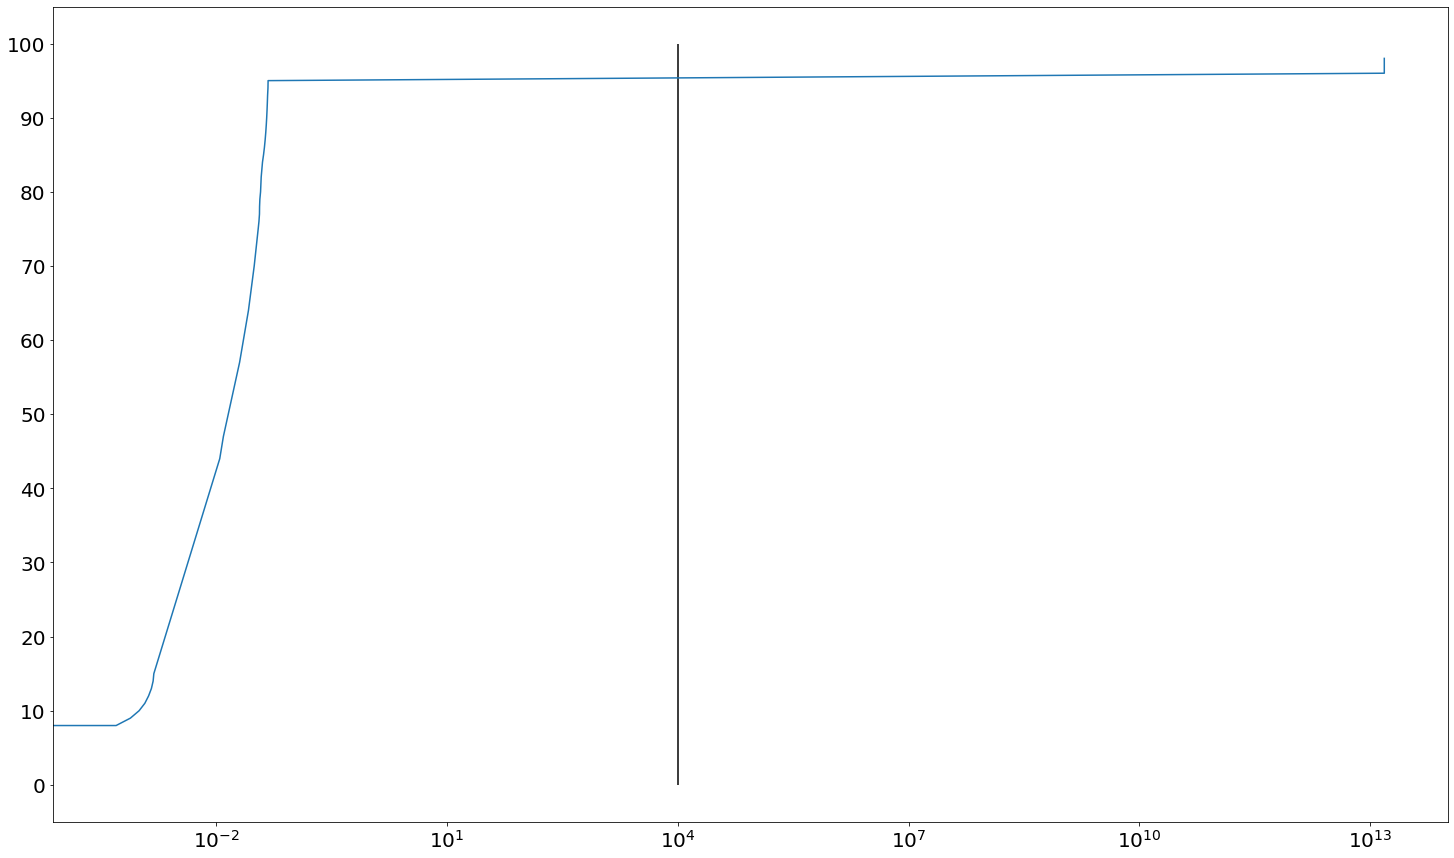

In [113]:
time = event.time-event.time_1pe
sumpe = np.cumsum(event.pedetected)
plt.plot(time, sumpe)
plt.xscale("log")
plt.yticks(range(0, 110, 10))
plt.vlines(10000, 0, 100)
plt.show()

In [39]:
df_ar41_cut1000

,eventnumber,PID,time,x,y,z,r,material,energydeposition,kineticenergy,...,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18,OuterSlice19
0,36,2112,89.815100,246.278000,-241.963000,54.983600,345.252000,ArgonLiquid,3.033081,707.284778,...,0,0,0,0,0,0,0,0,0,0
1,36,2112,177.759602,-69.949246,-386.404745,-172.141497,392.685018,ArgonLiquid,3.088970,524.693863,...,0,0,0,0,0,0,0,0,0,0
2,36,2112,401.039868,-80.485758,42.753408,264.471385,91.136223,ArgonLiquid,6.381802,280.710946,...,0,0,0,0,0,0,0,0,0,0
3,36,2112,434.317253,-194.481454,-9.406059,66.932957,194.708782,ArgonLiquid,9.887436,248.443114,...,0,0,0,0,0,0,0,0,0,0
4,36,2112,505.001881,-337.657387,-95.758820,-60.789248,350.973307,ArgonLiquid,3.112204,204.841797,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030759,1999858,1000180400,198.540095,66.702886,-211.113326,-1324.654897,221.400342,ArgonLiquid,29.018480,0.000000,...,0,0,0,0,0,0,0,0,0,0
4030760,1999858,1000180400,198.365787,67.207030,-211.622907,-1325.815608,222.038374,ArgonLiquid,30.879765,0.000000,...,0,0,0,0,0,0,0,0,0,0
4030761,1999858,1000180400,87.785691,-13.930759,-292.538534,-445.315344,292.870040,ArgonLiquid,15.470149,0.000000,...,0,0,0,0,0,0,0,0,0,0
4030762,1999858,1000180400,36.813970,61.509870,81.545126,-251.679066,102.142409,ArgonLiquid,15.252678,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df_ar41_100cylinder_01Mev[(df_ar41_100cylinder_01Mev.eventnumber==21863) & (df_ar41_100cylinder_01Mev.PID==1000180410)]

,eventnumber,PID,time,x,y,z,r,material,energydeposition,kineticenergy,...,OuterSlice10,OuterSlice11,OuterSlice12,OuterSlice13,OuterSlice14,OuterSlice15,OuterSlice16,OuterSlice17,OuterSlice18,OuterSlice19
39959,21863,1000180410,133.31946,-58.570692,58.116038,140.412324,82.510605,ArgonLiquid,2.946839,0.0,...,0,0,0,0,0,0,0,0,0,0
